In [43]:
import pandas as pd
from scipy.io import wavfile
from egg_io import *
from fpca_preprocess import *
import matplotlib.pyplot as plt

all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 4

In [44]:
# savedRow = random_test_file(all_data)
# savedRow = grabSpecificFile(all_data, 'egg_melt/Zapotec/speaker1M_eM3.wav')
# savedRow = grabSpecificFile(all_data, 'egg_melt/Bo/Village 2/F3_srii33_01.wav')
savedRow = grabSpecificFile(all_data, 'egg_melt/Bo/Village 2/F3_thuu_33_01.wav')

savedRow

speaker_id              Bo_F3
speaker_number              3
speaker_sex                 F
language                   Bo
language_variety    Village 2
                      ...    
SQ2_SQ1                 0.368
SQ4_SQ3                  0.39
ratio                   0.138
LPhon                Bo-Tense
SQ                    0.94359
Name: 5036, Length: 80, dtype: object

In [45]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)
egg = data[startSample:endSample]

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_12849/2311534566.py:1: WavFileWarning: Reached EOF prematurely; finished at 41112 bytes, expected 82144 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))


In [46]:
# new thing! low pass!
egg = lowpass(egg, samplerate, 722)

In [47]:
peaks = pitchmark(egg, samplerate, savedRow.strF0)
threshold = find_threshold(egg, peaks)

<function matplotlib.pyplot.show(close=None, block=None)>

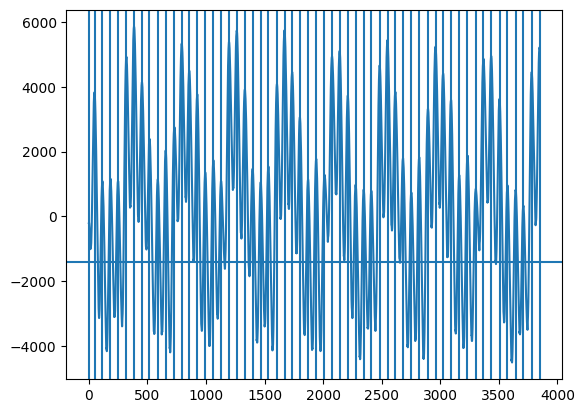

In [48]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.axhline(threshold)
plt.show

In [49]:
clipped_egg = clip_egg(egg, threshold, peaks)
# TODO: we're getting list index out of range here, in low-F0 cases. look into that if it happens a bunch!
# TODO: also, a lot of the gujarati data is reeeally choppy, i'd look into ways of making this algorithm more robust!
# ^ further, sometimes even in other languages the threshold is too low. raising it would come at the cost of research backing, but might give us more pages!!!
final = normalize_egg(clipped_egg)

plt.plot(final)
plt.show

ValueError: min() arg is an empty sequence